In [36]:
#%% Import packages 

# general
import numpy as np
import pandas as pd

# plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# my functions/classes
import sys
sys.path.append("../core_scripts/")
from ECMclass import ECM

In [37]:
# smoothing window, mm
window = 10

# paths
path_to_data = '../../data/'
path_to_figures = '../../../figures/'
metadata_file = 'metadata.csv'

In [38]:
#%% Read in metadata and import data

meta = pd.read_csv(path_to_data+metadata_file)

# import each script as an ECM class item
data = []
cores = []
sections = []
faces = []
ACorDCs = []
for index,row in meta.iterrows():
    
    core = row['core']
    section = row['section']
    face = row['face']
    ACorDC = row['ACorDC']
    
    if core == 'alhic2416':
        
        print("Reading "+core+", section "+section+'-'+face+'-'+ACorDC)
    
        data_item = ECM(core,section,face,ACorDC)
        data_item.rem_ends(10)
        data_item.smooth(window)
        data_item.norm_all()
        #data_item.norm_outside()
        data.append(data_item)
        
        cores.append(core)
        sections.append(section)
        faces.append(face)
        ACorDCs.append(ACorDC)

sec = set(sections)

Reading alhic2416, section 19-w1-AC
Reading alhic2416, section 19-w1-DC
Reading alhic2416, section 20-w1-AC
Reading alhic2416, section 20-w1-DC
Reading alhic2416, section 22-w1-AC
Reading alhic2416, section 22-w1-DC
Reading alhic2416, section 27-w1-AC
Reading alhic2416, section 27-w1-DC
Reading alhic2416, section 28-w1-AC
Reading alhic2416, section 28-w1-DC
Reading alhic2416, section 30-w1-AC
Reading alhic2416, section 30-w1-DC
Reading alhic2416, section 31-w1-AC
Reading alhic2416, section 31-w1-DC
Reading alhic2416, section 33-w1-AC
Reading alhic2416, section 33-w1-DC
Reading alhic2416, section 35-w1-AC
Reading alhic2416, section 35-w1-DC
Reading alhic2416, section 36-w1-AC
Reading alhic2416, section 36-w1-DC
Reading alhic2416, section 37-w1-AC
Reading alhic2416, section 37-w1-DC
Reading alhic2416, section 39-w1-AC
Reading alhic2416, section 39-w1-DC
Reading alhic2416, section 41-w1-AC
Reading alhic2416, section 41-w1-DC
Reading alhic2416, section 41-w1-DC
Reading alhic2416, section 4

In [39]:
def plotquarter(y_vec,ycor,d,meas,button,axs,rescale,plot_button = False):

    res = 0.002
    
    width = y_vec[1] - y_vec[0]
    
    for y in y_vec:
        
        
        idx = ycor==y
        
        tmeas = meas[idx]
        tbut = button[idx]
        tycor = ycor[idx]
        td = d[idx]

        #downsample ECM to save plotting time (as needed)
        if res != 0:
            int_lo = round(min(td),2)
            int_hi = round(max(td),2)
            depth_interp = np.linspace(int_lo,int_hi,int((int_hi-int_lo)/res)+1)
            meas_interp = np.interp(depth_interp,np.flip(td),np.flip(tmeas))
            but_interp = np.interp(depth_interp,np.flip(td),np.flip(tbut))
            td = depth_interp
            tmeas = meas_interp
            tbut = np.round(but_interp)
        
        for i in range(len(tmeas)-1):
            
            if tbut[i] == 0 or not plot_button:
                
                axs.add_patch(Rectangle((y-(width-0.2)/2,td[i]),(width-0.2),td[i+1]-td[i],facecolor=my_cmap(rescale(tmeas[i]))))
            else:
                axs.add_patch(Rectangle((y-(width-0.2)/2,td[i]),(width-0.2),td[i+1]-td[i],facecolor='k'))
            
    return()

In [40]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    
    return(unique_list)


In [41]:
# make colormap
my_cmap = matplotlib.colormaps['Spectral']

Plotting with buttons
    Running Section 19
    Running Section 20
    Running Section 22
    Running Section 27
    Running Section 28
    Running Section 30
    Running Section 31
    Running Section 33
    Running Section 35
    Running Section 36
    Running Section 37
    Running Section 39
    Running Section 41
    Running Section 42
    Running Section 43
    Running Section 44
    Running Section 45
    Running Section 46
    Running Section 48
    Running Section 51
    Running Section 52a


/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_94313/1617675007.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3,1, 3]},figsize=(9,6),dpi=100)


sec not converted to integer
    Running Section 52b
sec not converted to integer
    Running Section 53


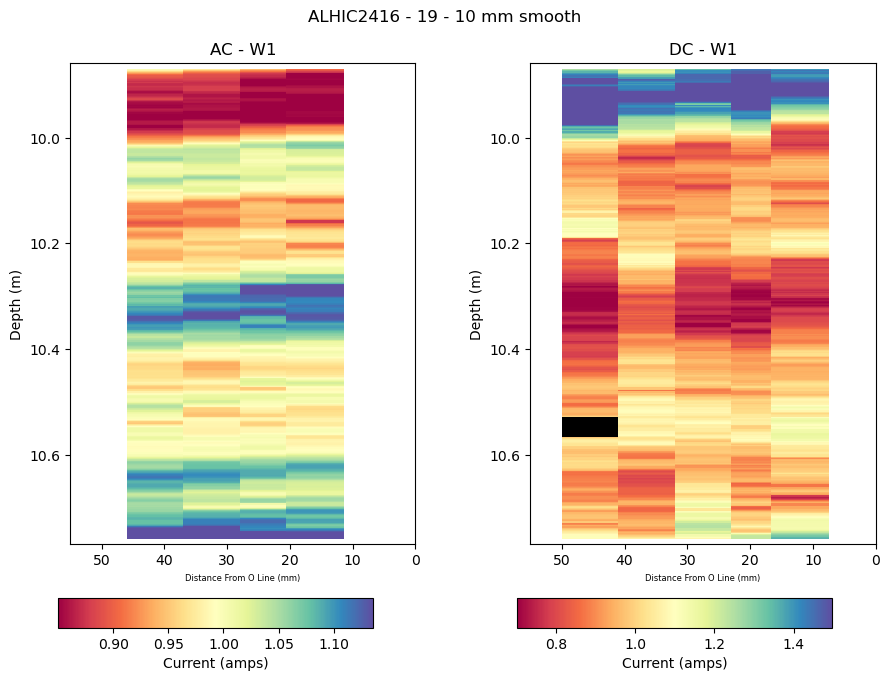

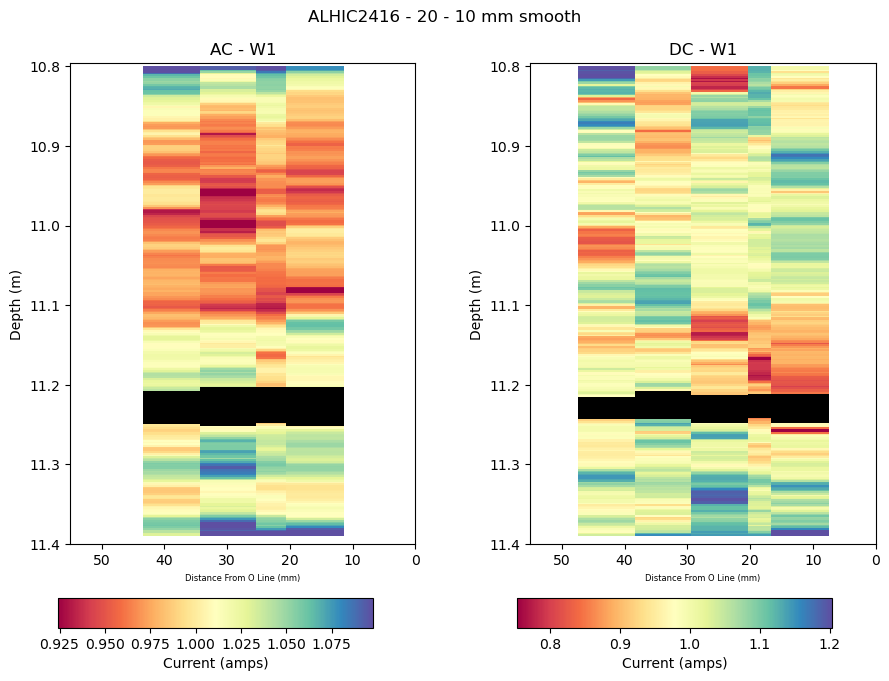

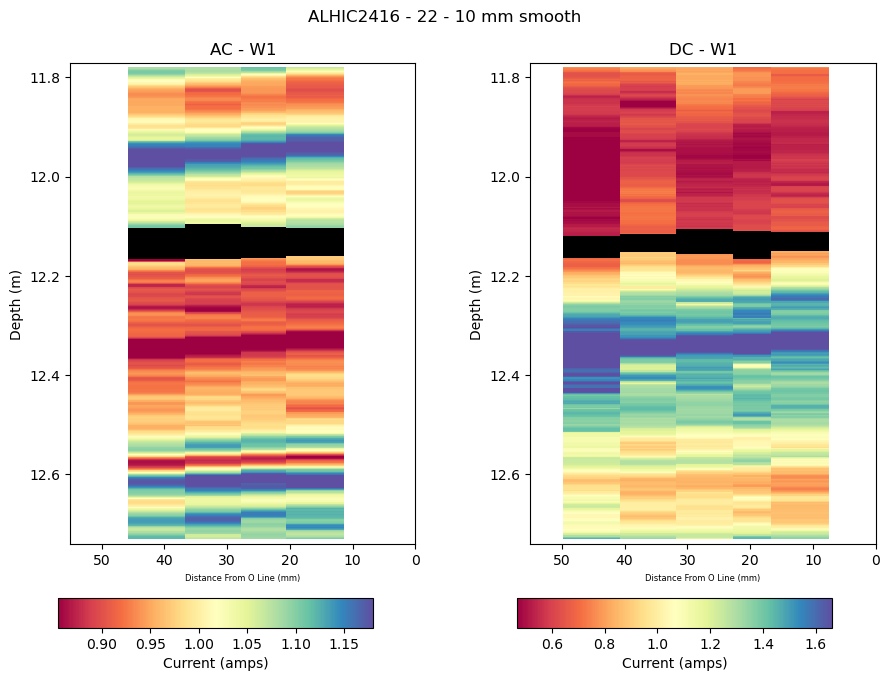

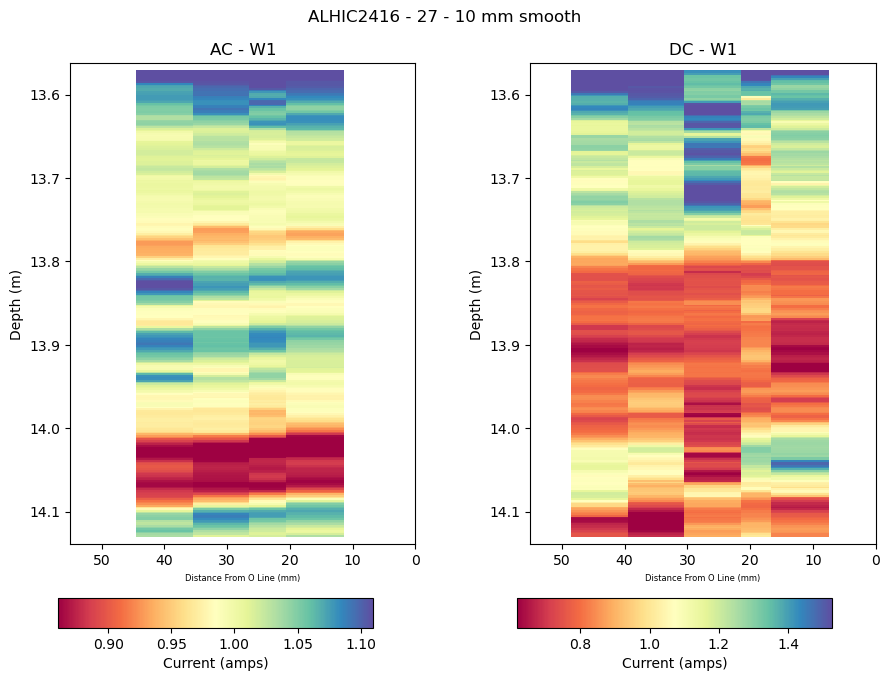

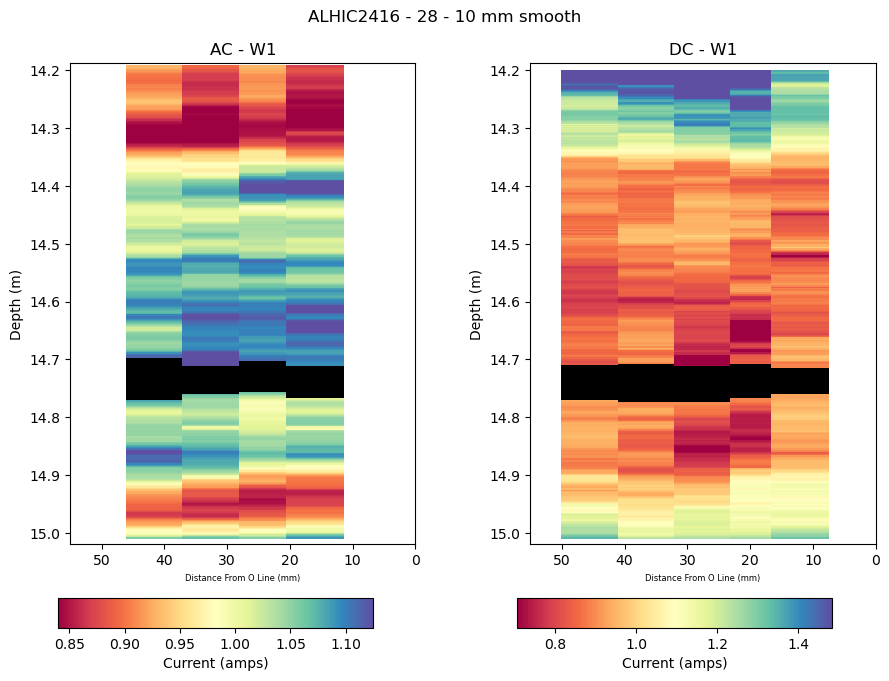

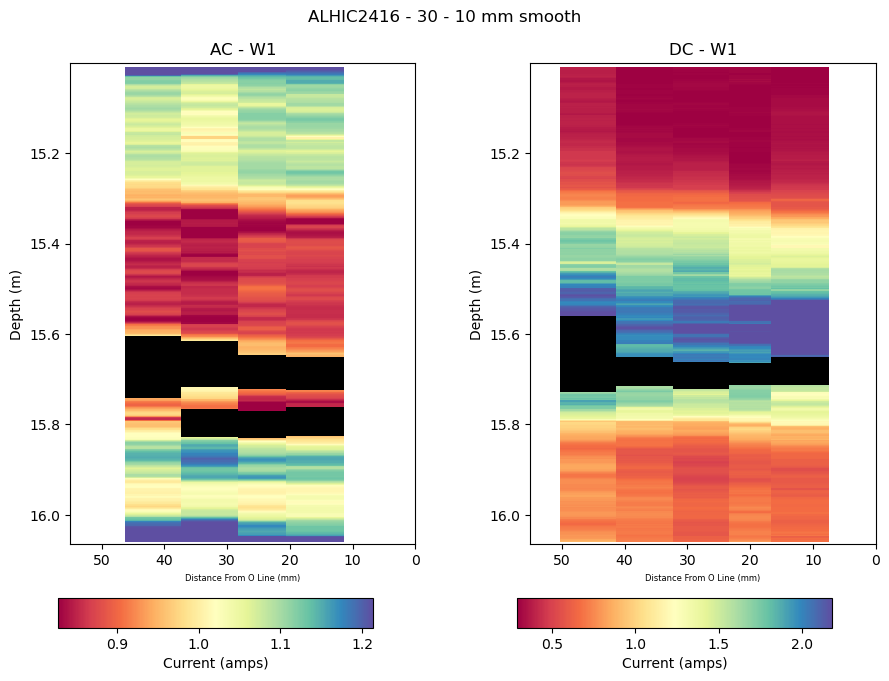

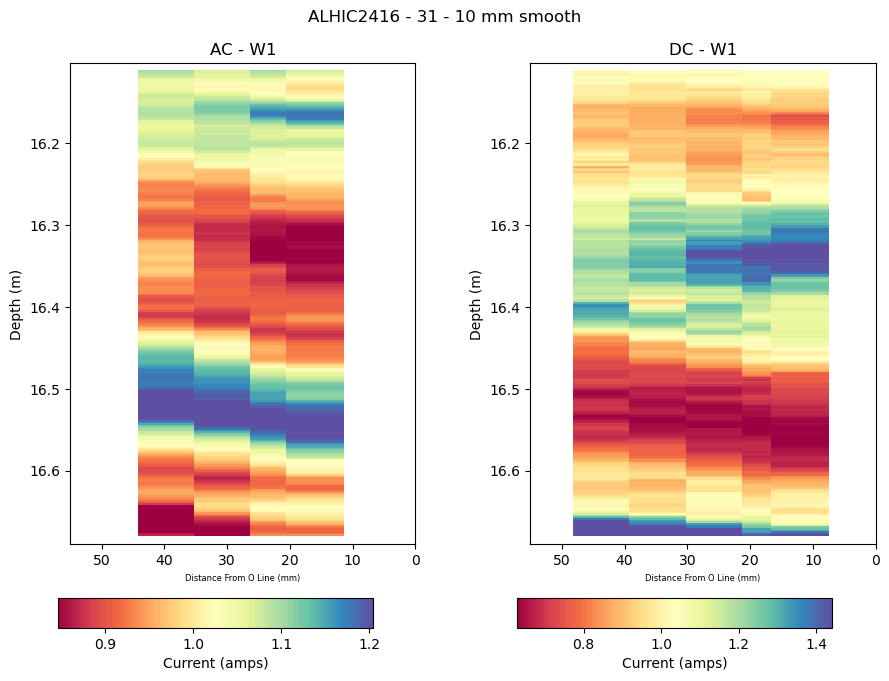

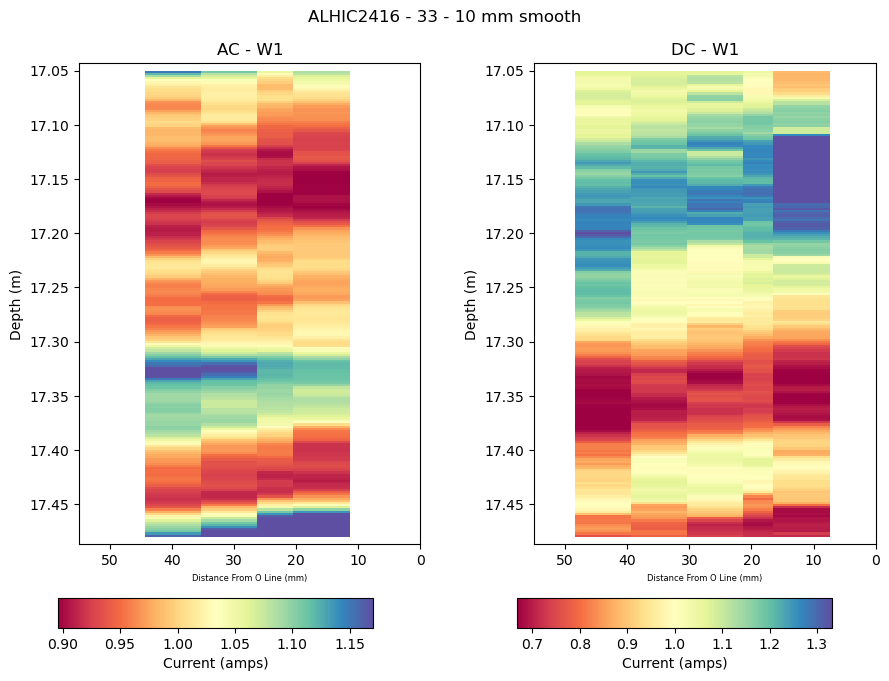

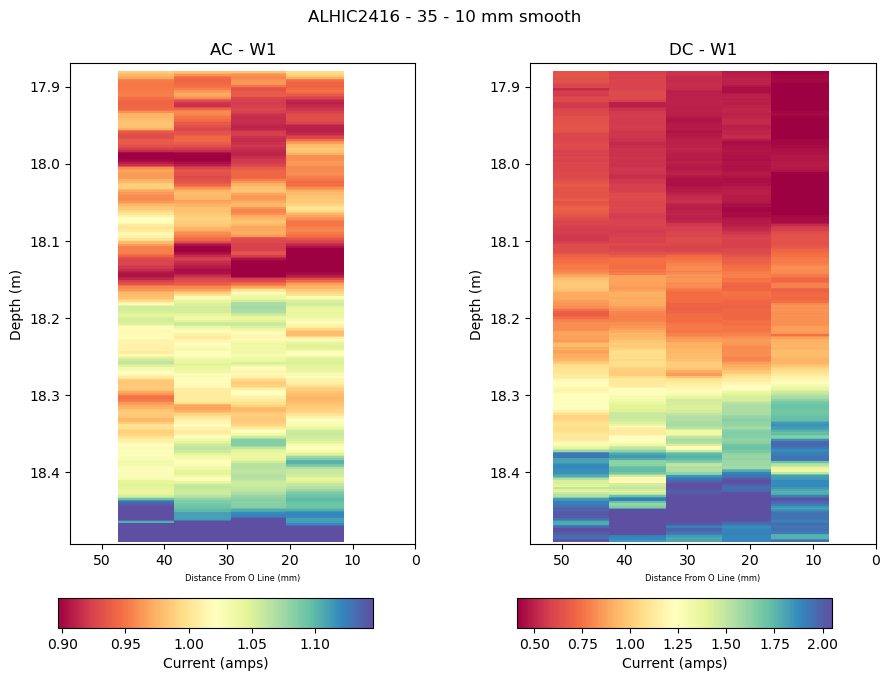

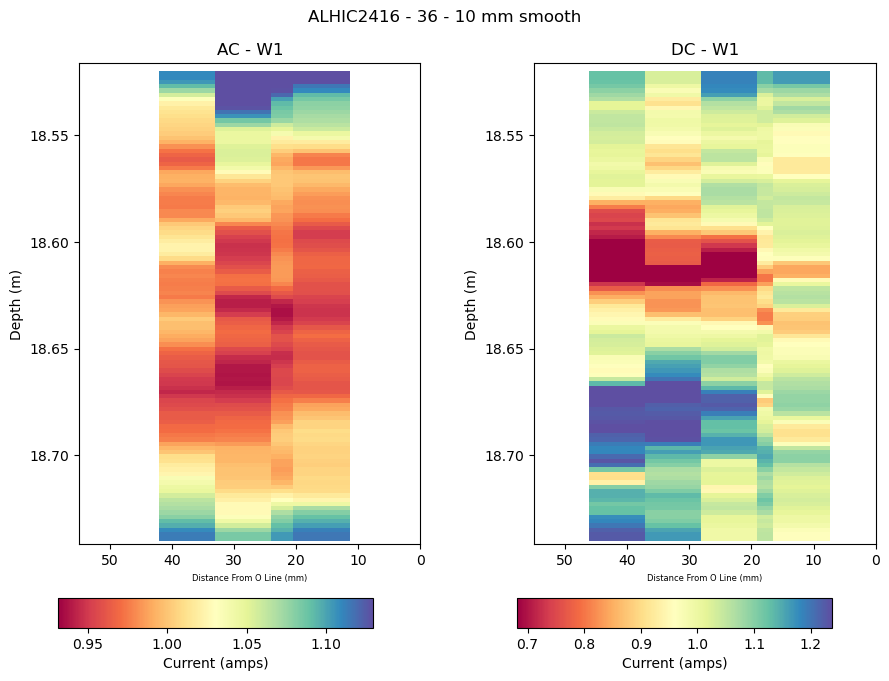

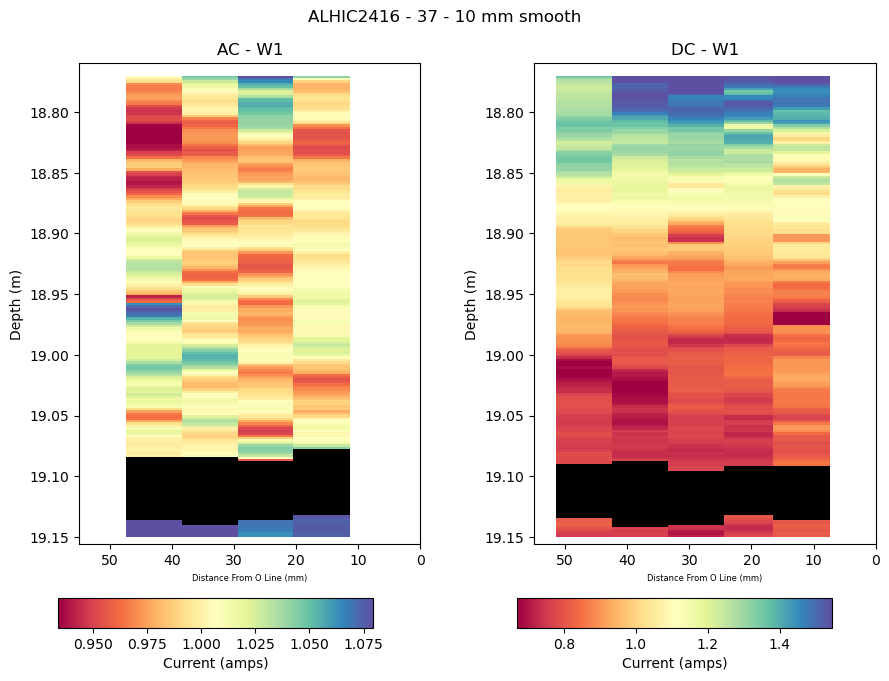

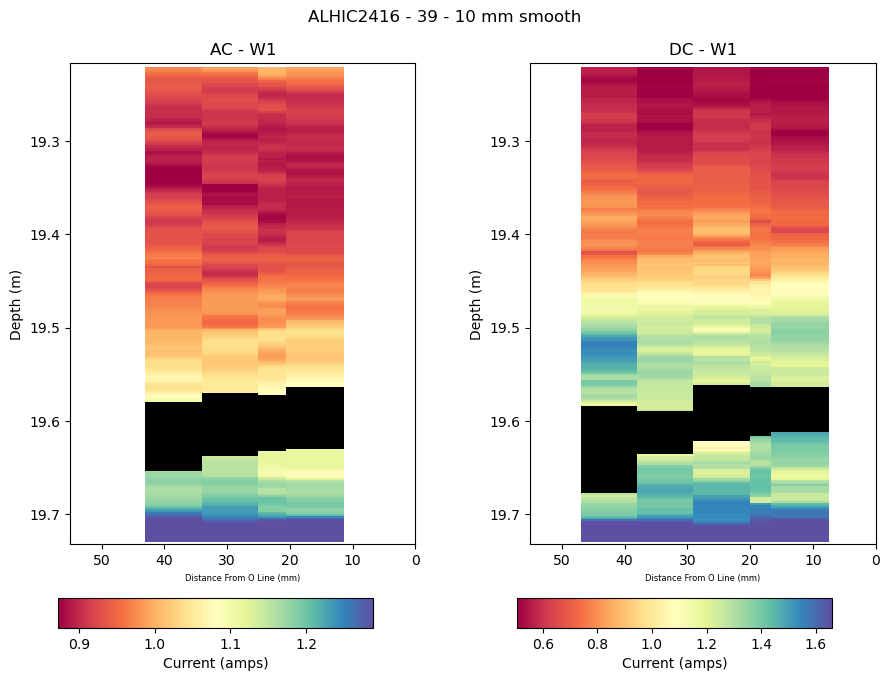

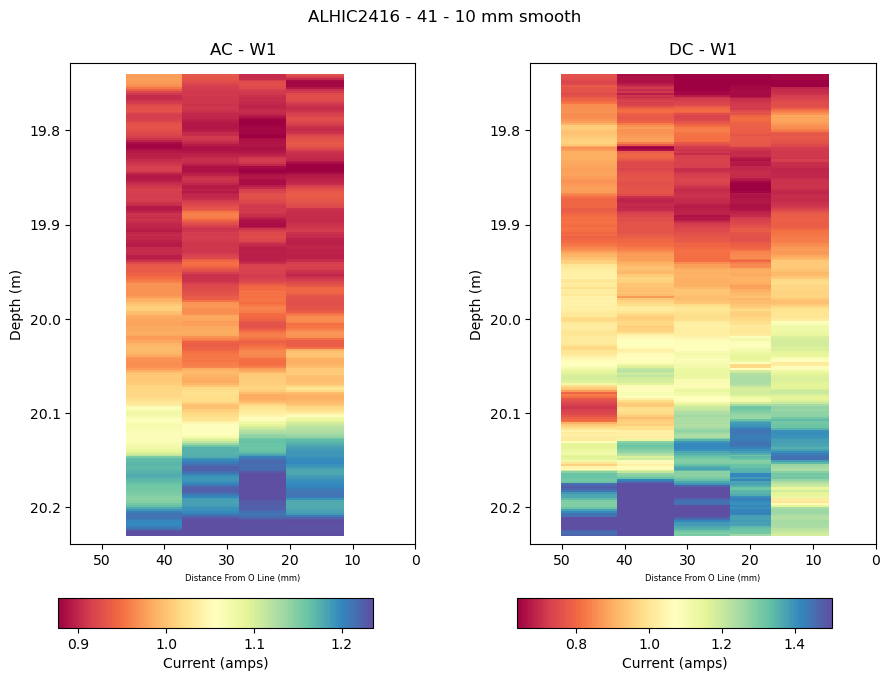

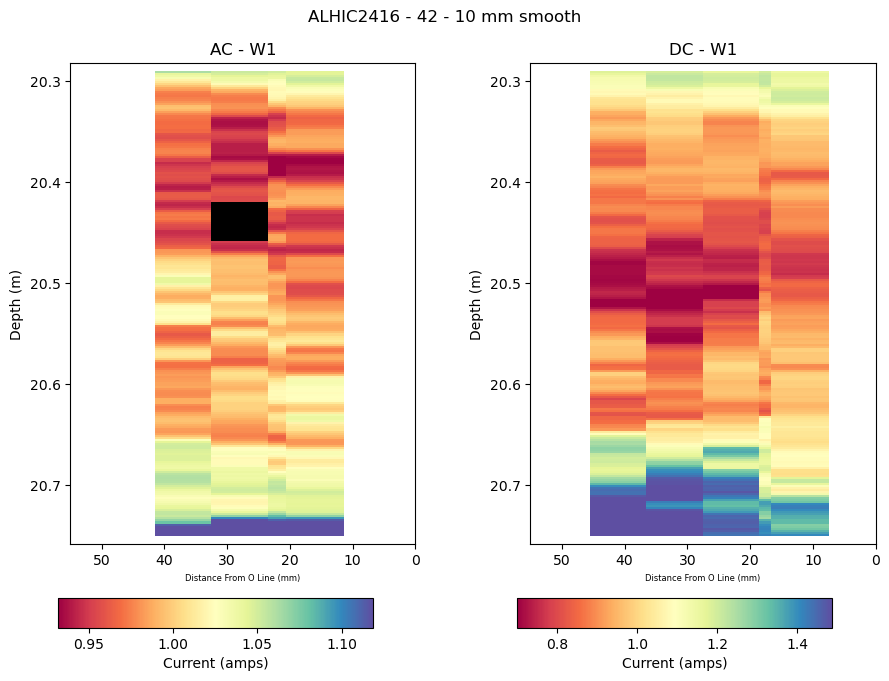

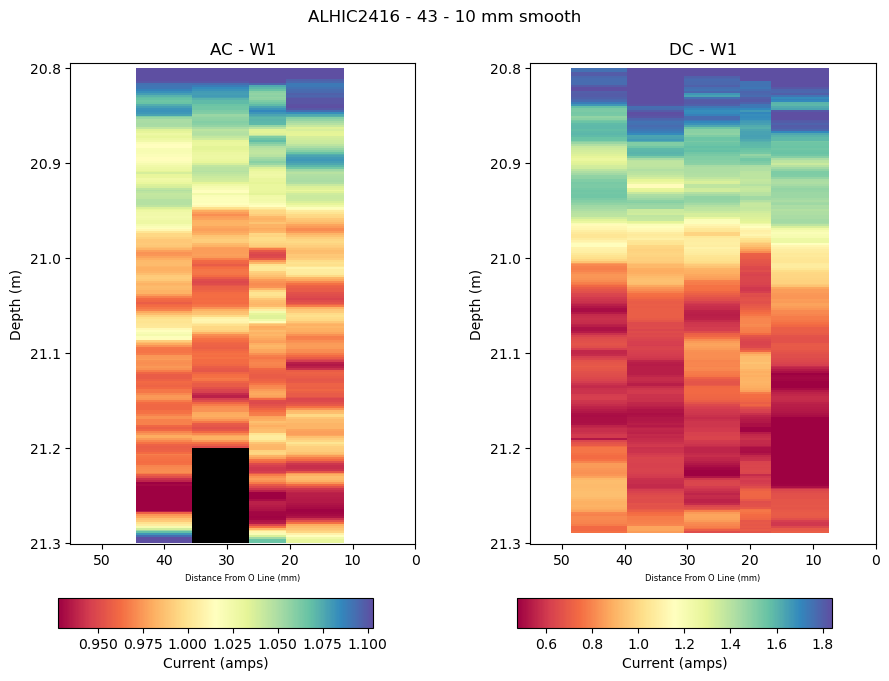

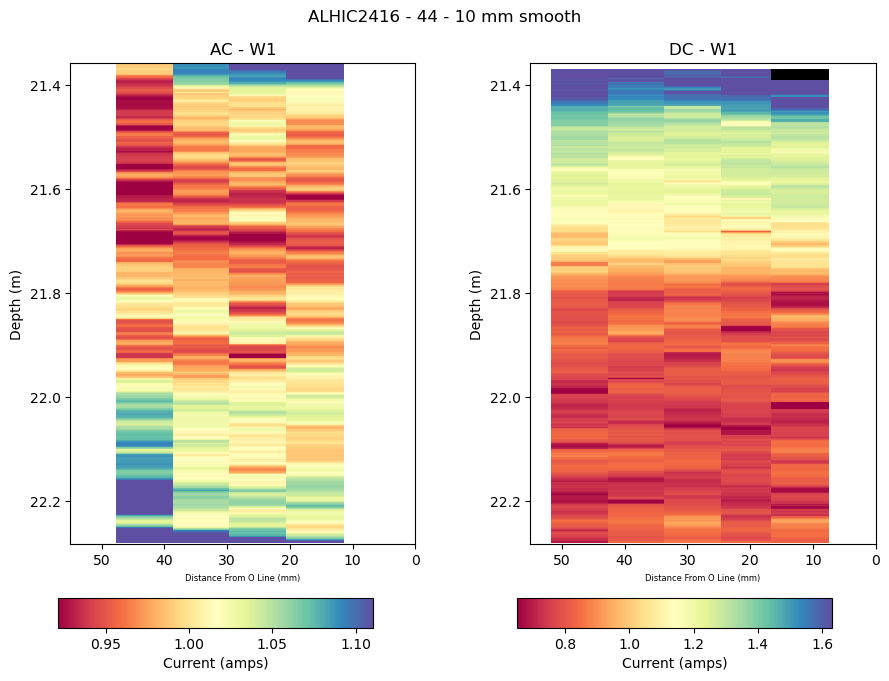

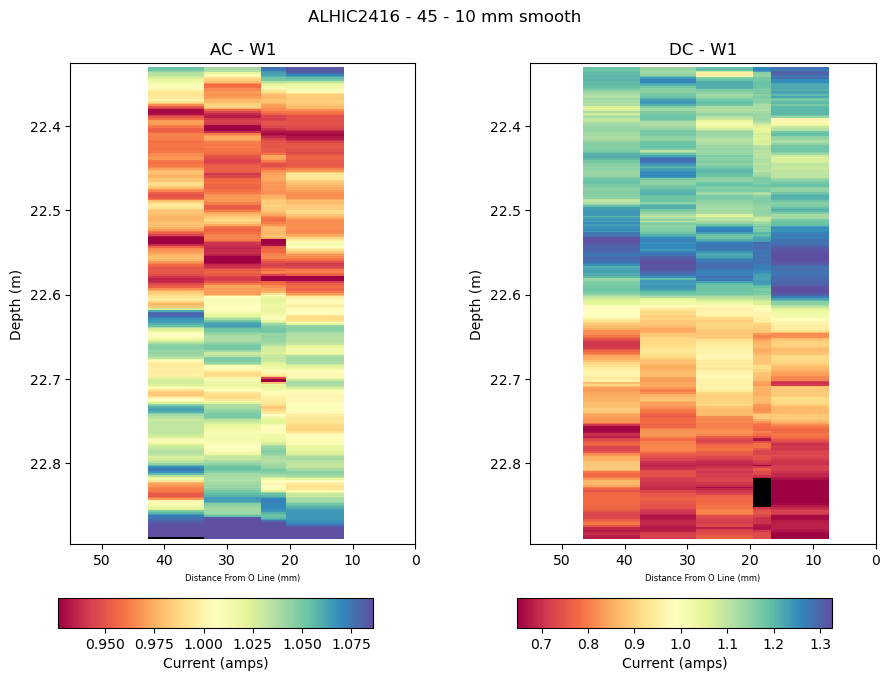

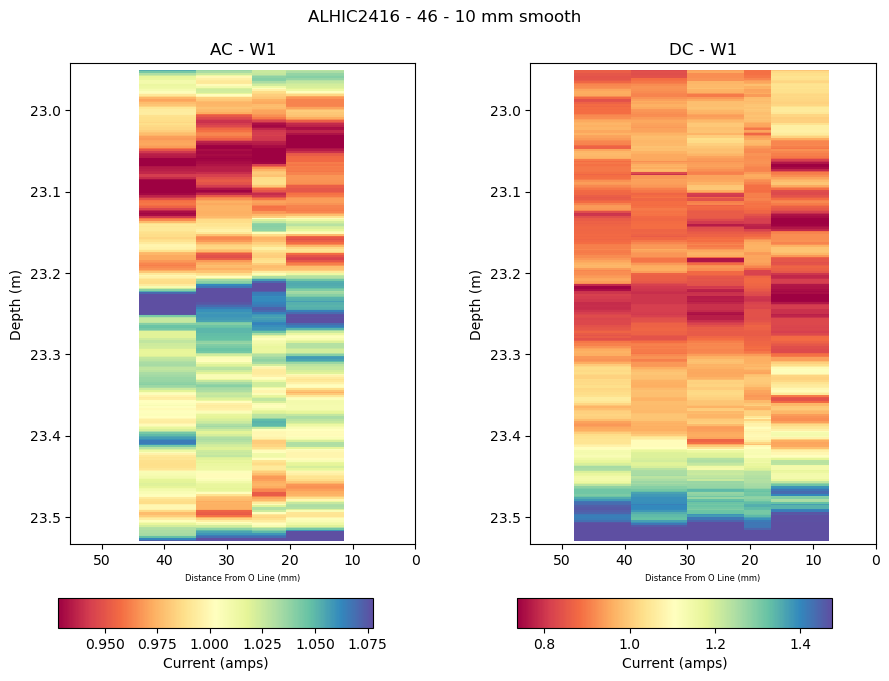

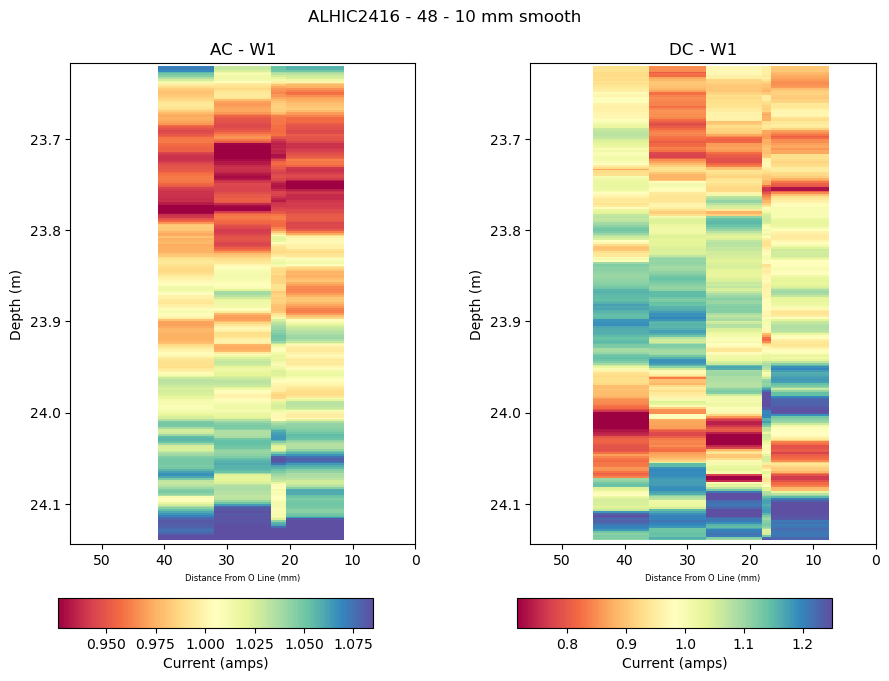

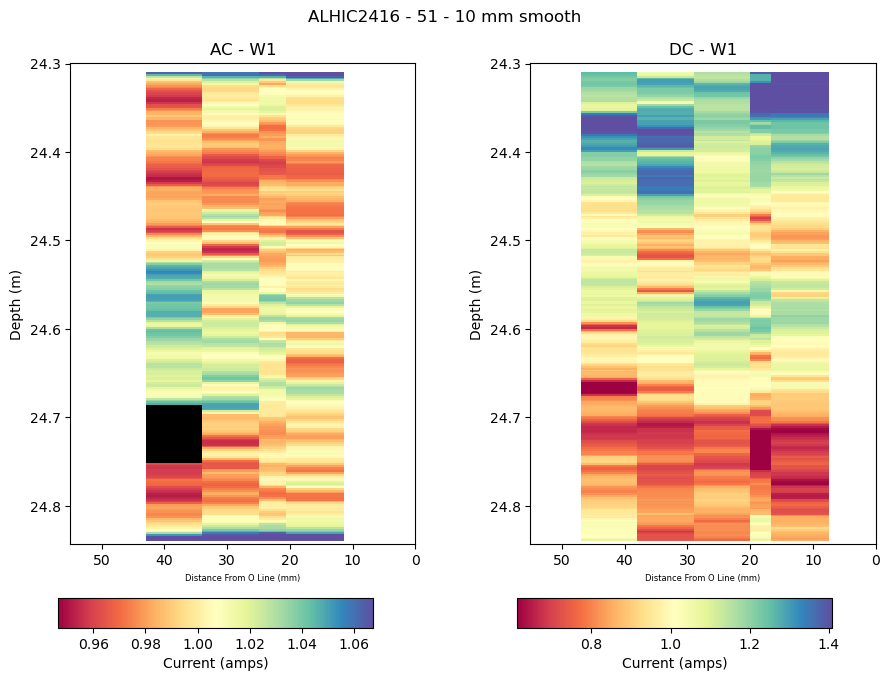

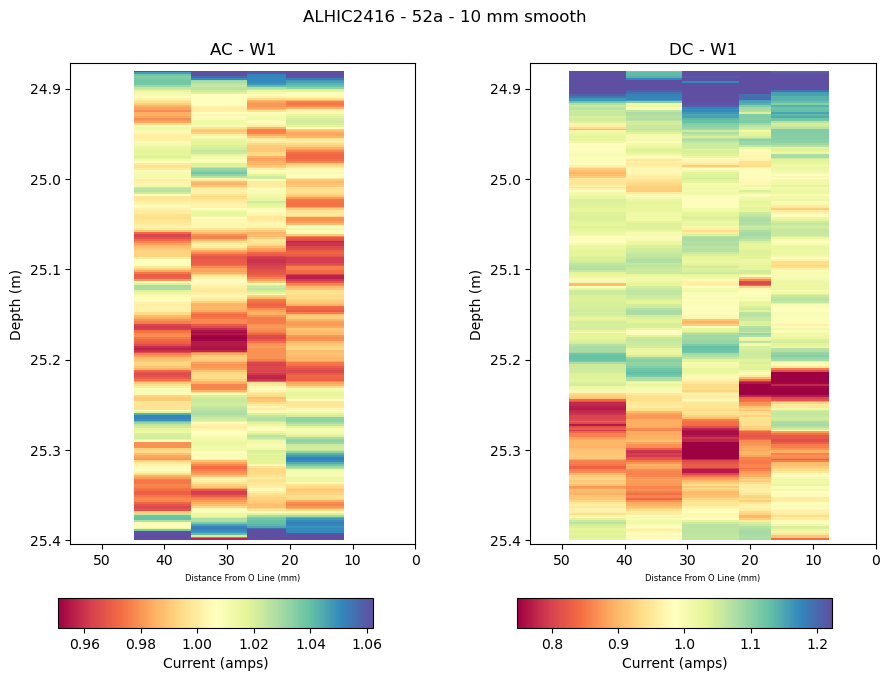

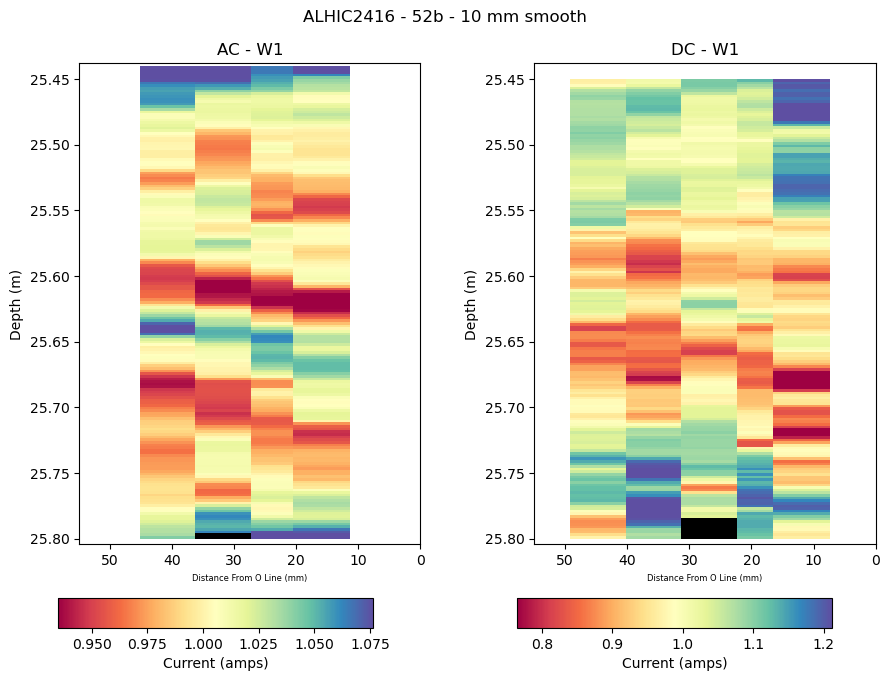

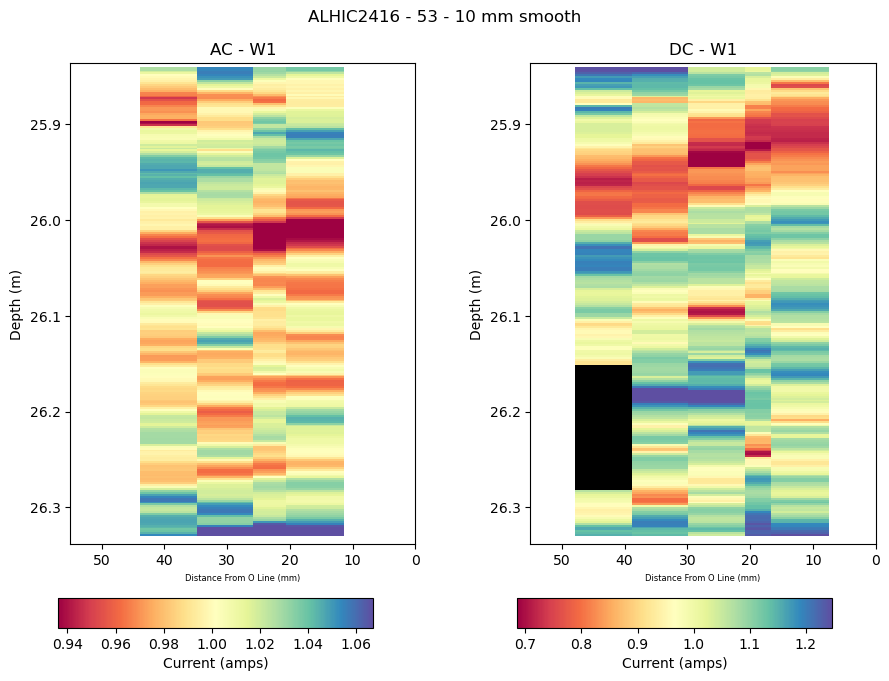

In [42]:
for plt_but in [True]:

    if plt_but:
        print('Plotting with buttons')
    else:
        print('Plotting without buttons')

    for sec in unique(sections):

        
        # print update
        print("    Running Section "+sec)
        
        # set data to empty
        AC_w1 = None
        DC_w1 = None


        #loop through data 
        for d in data:
            
            # find faces
            if d.section==sec:
                if d.ACorDC == 'AC':
                    if d.face == 'w1':
                        AC_w1 = d
                else:

                    if d.face == 'w1':
                        DC_w1 = d



        
        # find depth max and minimum
        minvec = []
        maxvec = []
        AC_all = []
        DC_all = []
        for data_face in [AC_w1,DC_w1]:
            if data_face != None:
                minvec.append(min(data_face.depth))
                maxvec.append(max(data_face.depth))

                mask = data_face.button == 0
                if data_face.ACorDC == 'AC':
                    AC_all.extend(data_face.meas[mask])
                else:
                    DC_all.extend(data_face.meas[mask])
            
        ACpltmin = np.percentile(AC_all,5)
        ACpltmax = np.percentile(AC_all,95)
        DCpltmin = np.percentile(DC_all,5)
        DCpltmax = np.percentile(DC_all,95)  
        ACrescale = lambda k: (k-ACpltmin) /  (ACpltmax-ACpltmin)
        DCrescale = lambda k: (k-DCpltmin) /  (DCpltmax-DCpltmin)
        dmin = min(minvec)
        dmax = max(maxvec)
        
        # make figure
        fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3,1, 3]},figsize=(9,6),dpi=100)
        
            

        for a in [ax[0],ax[2]]:
            a.set_xlim([55,0])
            a.set_xlabel('Distance From O Line (mm)',fontsize=6)
            a.set_ylim([dmax, dmin])
            a.set_ylabel('Depth (m)')
            
            
        for a,data_face in zip([ax[0],ax[2]],[AC_w1,DC_w1]):
            
            if data_face != None:
                if data_face.face == 'w2':
                    yall = data_face.y_s - data_face.y_left
                    yvec = data_face.y_vec - data_face.y_left
                else:
                    yall = data_face.y_right - data_face.y_s
                    yvec = data_face.y_right - data_face.y_vec
                
                if data_face.ACorDC =='AC':
                    rescale = ACrescale
                else:
                    rescale = DCrescale
            
            
            
                # plot data
                plotquarter(yvec,
                            yall,
                            data_face.depth_s,
                            data_face.meas_s,
                            data_face.button_s,
                            a,
                            rescale,
                            plot_button = plt_but)
        
        # housekeeping
        fig.suptitle('ALHIC2416 - '+sec+' - '+str(window)+' mm smooth')
        ax[1].axis('off')
        ax[0].set_title('AC - W1')
        ax[2].set_title('DC - W1')
        
        fig.tight_layout()
        plt.subplots_adjust(wspace=0)
    
        # ad colorbar
        #fig.subplots_adjust(bottom=0.8)
        #    ACcbar_ax = fig.add_axes([0.08,-0.07,0.35,0.05])
        ACcbar_ax = fig.add_axes([0.07,-0.05,0.35,0.05])
        ACnorm = matplotlib.colors.Normalize(vmin=ACpltmin,vmax=ACpltmax)
        DCcbar_ax = fig.add_axes([0.58,-0.05,0.35,0.05])
        DCnorm = matplotlib.colors.Normalize(vmin=DCpltmin,vmax=DCpltmax)
        ACcbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=ACnorm, cmap=my_cmap),cax=ACcbar_ax,
                    orientation='horizontal',label='Current (amps)')
        DCcbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=DCnorm, cmap=my_cmap),cax=DCcbar_ax,
                    orientation='horizontal',label='Current (amps)')
        
        # save figure
        try:
            if int(sec) <10:
                sec = '0'+sec
        except:
            print("sec not converted to integer")
        if plt_but:
            fname = path_to_figures +'alhic2416_button/alhic2416-'+sec+'-button.png'
        else:
            fname = path_to_figures +'alhic2416_nobutton/alhic2416-'+sec+'-no-button.png'
        fig.savefig(fname,bbox_inches='tight')
